In [2]:
##Importing libaries#
import warnings 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose

Matplotlib is building the font cache; this may take a moment.


In [3]:
#Instaling and importing seaborn
%pip install seaborn
import seaborn as sns

# Set a style for the plots
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [4]:
df = pd.read_csv('data/Tinac Dataset.csv') #Loading Dataset (Titanic Dataset)
print(df.head())
print(df.info()) #Assessing data

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [ ]:
# Check for missing values in the entire DataFrame
print("Missing values in the entire DataFrame (boolean):\n")
print(df.isnull())

# Count the number of missing values per column
print("\nNumber of missing values per column:\n")
print(df.isnull().sum())

# Check if there are any missing values in the DataFrame
print("\nAre there any missing values in the DataFrame?")
print(df.isnull().values.any())

# Count the total number of missing values in the DataFrame
print("\nTotal number of missing values in the DataFrame:")
print(df.isnull().sum().sum())

# Alternatively, using .isna() which is an alias for .isnull()
print("\nUsing .isna() to count missing values per column:\n")
print(df.isna().sum())

In [5]:
#Handling Columns
print(df['Age'].median()) #Determining the median of the Age Column
df['Age'] = df['Age'].fillna(28.0) #Imputing missing values in 'Age' with the median

28.0


In [6]:
# Define a custom function to fill NaN with mode
def fill_with_mode(column):
    mode = column.mode()[0]
    return column.fillna(mode)
# Apply the custom function to the DataFrame
df['Embarked'] = fill_with_mode(df['Embarked']) #Filling 'Embarked NaN with mode 
print(df) #Assessing the new DataFrame

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [7]:
df.drop('Cabin', axis=1, inplace=True) #Dropping Cabin Column due to high of missing values

In [8]:
df.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True) #Unique/Complex Or irrelevant columns/information

In [9]:
#Convert categorical columns to the category data
df['Survived'] = df['Survived'].astype(float) 
df['Pclass'] = df['Pclass'].astype('category') 

In [10]:
print(df.isna().sum()) #Assessing the total number of null values in the dataframe
print(df.info())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    float64 
 1   Pclass    891 non-null    category
 2   Sex       891 non-null    object  
 3   Age       891 non-null    float64 
 4   SibSp     891 non-null    int64   
 5   Parch     891 non-null    int64   
 6   Fare      891 non-null    float64 
 7   Embarked  891 non-null    object  
dtypes: category(1), float64(3), int64(2), object(2)
memory usage: 42.8+ KB
None


In [11]:
print(df.describe()) #Generating descriptive statistics for numerical columns

         Survived         Age       SibSp       Parch        Fare
count  891.000000  891.000000  891.000000  891.000000  891.000000
mean     0.383838   29.361582    0.523008    0.381594   32.204208
std      0.486592   13.019697    1.102743    0.806057   49.693429
min      0.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000   22.000000    0.000000    0.000000    7.910400
50%      0.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000   35.000000    1.000000    0.000000   31.000000
max      1.000000   80.000000    8.000000    6.000000  512.329200


In [12]:
#Analysing Survival rate by social classes
df.groupby('Sex')['Survived'].mean().sort_values() #Checking the mean of those who survived to determine the survival rate

Sex
male      0.188908
female    0.742038
Name: Survived, dtype: float64

In [13]:
df.groupby('Pclass')['Survived'].mean().sort_values() #Checking mean of survival by ticket class (Socio_economic status) 

<ipython-input-13-28f13cb7c429>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Pclass')['Survived'].mean().sort_values() #Checking mean of survival by ticket class (Socio_economic status)


Pclass
3    0.242363
2    0.472826
1    0.629630
Name: Survived, dtype: float64

In [14]:
 df.groupby('Embarked')['Survived'].mean().sort_values() #Port to see if location affected chances of surviving (Embarked)

Embarked
S    0.339009
Q    0.389610
C    0.553571
Name: Survived, dtype: float64

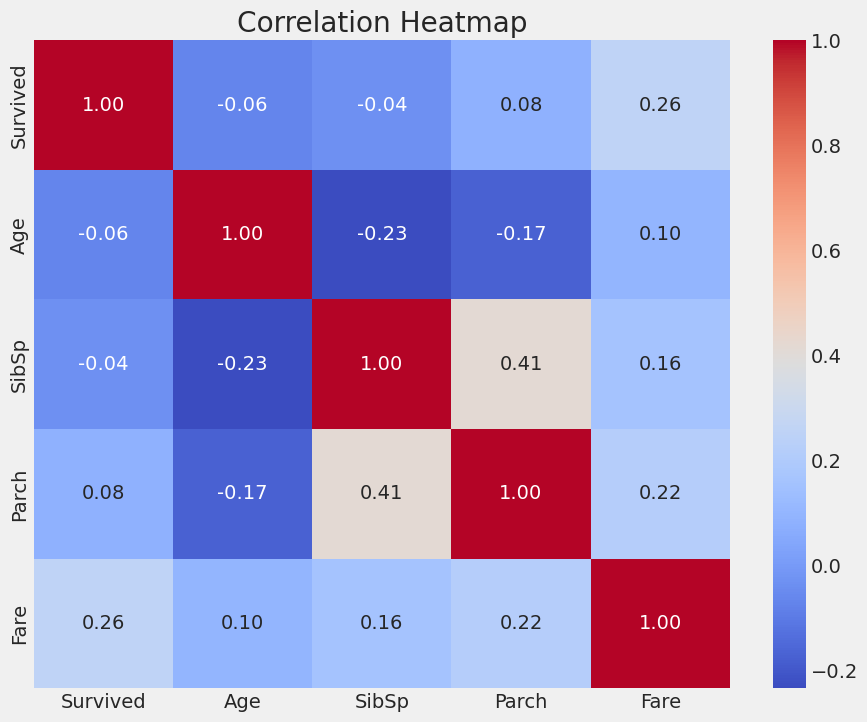

In [15]:
#Correlation Heatmap
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm') #Visualizing correlation between numerical features and the chance of surviving
plt.title("Correlation Heatmap") #Adding Title
plt.show() #Showing the heatmap

<ipython-input-16-49db40a977e3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=df, palette='viridis') #Create a bar plot to visually compare the survival rate between males and females.


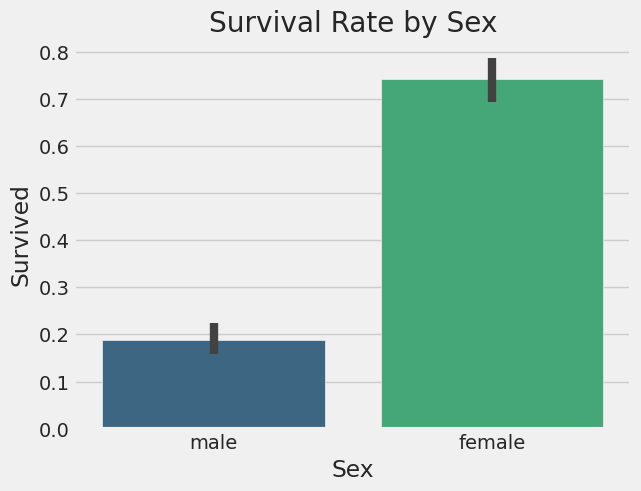

In [16]:
#Survival Bar Plot (Sex) 

sns.barplot(x='Sex', y='Survived', data=df, palette='viridis') #Create a bar plot to visually compare the survival rate between males and females.
plt.title('Survival Rate by Sex') # Add a title to the plot
plt.show() # Show the bar plot

<ipython-input-17-cc22ba41470b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=df, palette='magma') #Create a bar plot to show the survival rate across passenger classes (1st, 2nd, 3rd)


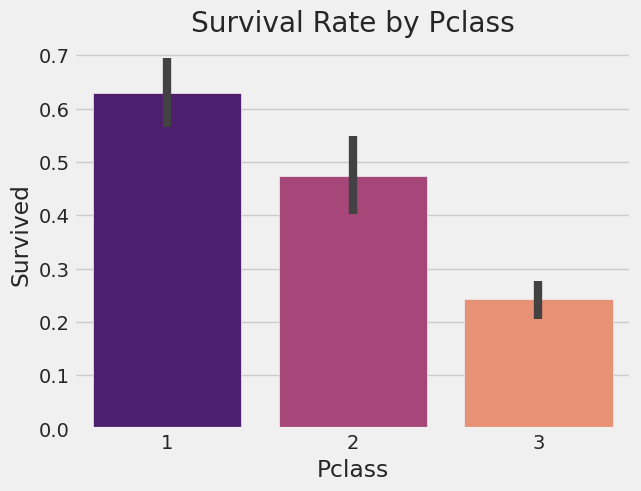

In [17]:
#Survival Bar Plot (Pclass)

sns.barplot(x='Pclass', y='Survived', data=df, palette='magma') #Create a bar plot to show the survival rate across passenger classes (1st, 2nd, 3rd)
plt.title('Survival Rate by Pclass') # Add a descriptive title
plt.show()# Display the plot

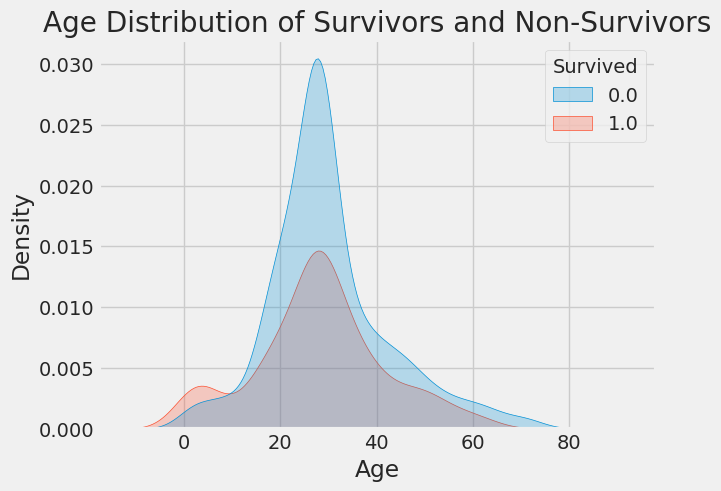

In [18]:
#Age Distribution

sns.kdeplot(data=df, x='Age', hue='Survived', fill=True) # Plot the age distribution for survivors and non-survivors
plt.title('Age Distribution of Survivors and Non-Survivors') # Add a descriptive title
plt.show() # Show the plot